# Metro Interstate Traffic Volume

## Data Information

## Source

Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume. <br>

The data sources are: 
- Traffic data from MN Department of Transportation <br>
- Weather data from OpenWeatherMap

### Attribute Information

The dataset has attributes and units are as follows:

- holiday Categorical US National holidays plus regional holiday, Minnesota State Fair
- temp Numeric Average temp in kelvin
- rain_1h Numeric Amount in mm of rain that occurred in the hour
- snow_1h Numeric Amount in mm of snow that occurred in the hour
- clouds_all Numeric Percentage of cloud cover
- weather_main Categorical Short textual description of the current weather
- weather_description Categorical Longer textual description of the current weather
- date_time DateTime Hour of the data collected in local CST time
- traffic_volume Numeric Hourly I-94 ATR 301 reported westbound traffic volume

## Notebook Setup

In [1]:
#Common imports
import sys
import os
import numpy as np

#Python Data Analysis Library
import pandas as pd

#Data visualization
%matplotlib inline 
#sets the backend of matplotlib to the 'inline' backend
#%matplotlib notebook
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Data Import

In [2]:
df = pd.read_csv("datasets/metro_interstate_traffic_volume/Metro_Interstate_Traffic_Volume.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
holiday                48204 non-null object
temp                   48204 non-null float64
rain_1h                48204 non-null float64
snow_1h                48204 non-null float64
clouds_all             48204 non-null int64
weather_main           48204 non-null object
weather_description    48204 non-null object
date_time              48204 non-null object
traffic_volume         48204 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [4]:
df.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918

## Data Engineering and Visualization

### Ensuring dtype consistency

In [5]:
df.date_time = pd.to_datetime(df.date_time,format = "%Y-%m-%d %H:%M:%S")

In [6]:
df.holiday.value_counts()

None                         48143
Labor Day                        7
Martin Luther King Jr Day        6
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Washingtons Birthday             5
Independence Day                 5
Columbus Day                     5
State Fair                       5
Veterans Day                     5
Memorial Day                     5
Name: holiday, dtype: int64

In [7]:
df.holiday = df.holiday.apply(lambda x: False if x== 'None' else True)

In [8]:
df.weather_main.value_counts()

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

In [9]:
df.weather_main = df.weather_main.astype('category')

In [10]:
df.weather_description.value_counts()

sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto

In [11]:
df = df.drop(columns = ['weather_description'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
holiday           48204 non-null bool
temp              48204 non-null float64
rain_1h           48204 non-null float64
snow_1h           48204 non-null float64
clouds_all        48204 non-null int64
weather_main      48204 non-null category
date_time         48204 non-null datetime64[ns]
traffic_volume    48204 non-null int64
dtypes: bool(1), category(1), datetime64[ns](1), float64(3), int64(2)
memory usage: 2.3 MB


In [13]:
df.sort_values(by='date_time').iloc[0,6]

Timestamp('2012-10-02 09:00:00')

In [14]:
nrow = len(df)-1
df.sort_values(by='date_time').iloc[nrow,6]

Timestamp('2018-09-30 23:00:00')

Calculation of total hours from start time to end time of the dataset.

In [15]:
(df.sort_values(by='date_time').iloc[nrow,6] - df.sort_values(by='date_time').iloc[0,6])/np.timedelta64(1, 'h')

52550.0

### Percentage of missing value

In [16]:
df.isnull().sum()/len(df)*100

holiday           0.0
temp              0.0
rain_1h           0.0
snow_1h           0.0
clouds_all        0.0
weather_main      0.0
date_time         0.0
traffic_volume    0.0
dtype: float64

### Descriptive statistics

In [17]:
df.describe()

temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  48204.000000  48204.000000  48204.000000  48204.000000    48204.000000
mean     281.205870      0.334264      0.000222     49.362231     3259.818355
std       13.338232     44.789133      0.008168     39.015750     1986.860670
min        0.000000      0.000000      0.000000      0.000000        0.000000
25%      272.160000      0.000000      0.000000      1.000000     1193.000000
50%      282.450000      0.000000      0.000000     64.000000     3380.000000
75%      291.806000      0.000000      0.000000     90.000000     4933.000000
max      310.070000   9831.300000      0.510000    100.000000     7280.000000

### Numerical and Categorical attributes

In [18]:
def coltype(data):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric = list(df.select_dtypes(include=numerics).columns)
    non_numeric =['bool','category']
    categorical = list(df.select_dtypes(include=non_numeric).columns)
    return (numeric, categorical)

In [19]:
df_numeric,df_categorical = coltype(df)

In [20]:
df_numeric

['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']

In [21]:
df_categorical

['holiday', 'weather_main']

### Histrograms for numeric

In [22]:
def hist_plots(data, numeric,col_no):
    data_fig = pd.melt(data, value_vars= numeric)
    fig = sns.FacetGrid(data_fig, col = "variable", col_wrap = col_no,sharex= False, sharey = False)
    fig = fig.map(sns.distplot, "value", color = 'c')
    return fig
#col_no : number of columns to display in one row
#numeric : name of numeric cols

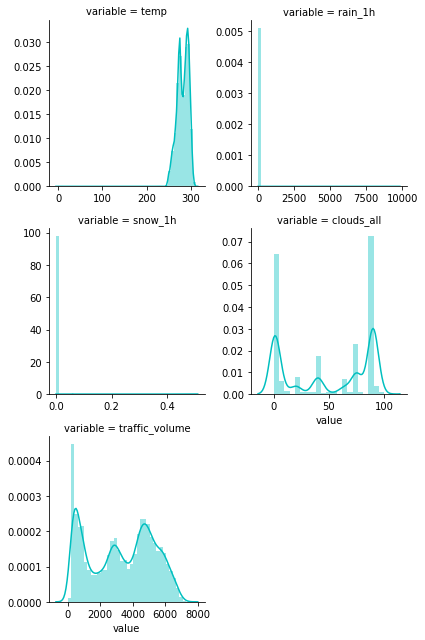

In [23]:
hist_plots(df,df_numeric,2)

### Time series plots

In [24]:
def individual_timeseries_plot(data,col_name,date_col):
    import matplotlib.dates as mdates
    tick_unit = mdates.YearLocator()  # every year
    tick_fmt = mdates.DateFormatter('%m-%y')
    from pandas.plotting import register_matplotlib_converters
    register_matplotlib_converters()
    fig, ax = plt.subplots()
    fig = sns.lineplot(x = date_col, y = col_name, data = df)
    ax.xaxis.set_major_locator(tick_unit)
    ax.xaxis.set_major_formatter(tick_fmt)

In [25]:
def multiple_plots_ts(data,df_numeric,date_col):
    n = len(df_numeric)
    for i in range(1,n+1):
        col_name = df_numeric[i-1]
        individual_timeseries_plot(data,col_name,date_col)
    return

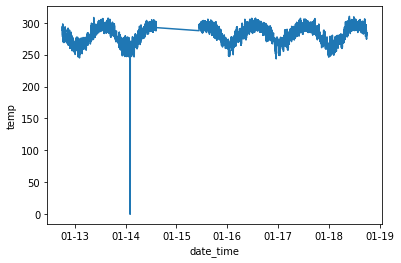

In [27]:
individual_timeseries_plot(df,'temp','date_time')

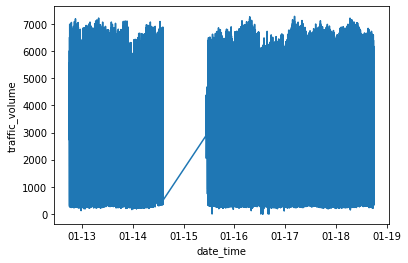

In [29]:
individual_timeseries_plot(df,'traffic_volume','date_time')

### Correlation matrix

In [30]:
# Compute pairwise correlation of Dataframe's attributes
corr = df.corr()
corr

holiday      temp   rain_1h   snow_1h  clouds_all  \
holiday         1.000000 -0.007713 -0.000216 -0.000969   -0.005610   
temp           -0.007713  1.000000  0.009069 -0.019755   -0.101976   
rain_1h        -0.000216  0.009069  1.000000 -0.000090    0.004818   
snow_1h        -0.000969 -0.019755 -0.000090  1.000000    0.027931   
clouds_all     -0.005610 -0.101976  0.004818  0.027931    1.000000   
traffic_volume -0.042897  0.130299  0.004714  0.000733    0.067054   

                traffic_volume  
holiday              -0.042897  
temp                  0.130299  
rain_1h               0.004714  
snow_1h               0.000733  
clouds_all            0.067054  
traffic_volume        1.000000

In [31]:
def corr_plot(data_corr):
    palette = sns.diverging_palette(20, 220, as_cmap=True)
    fig, (ax) = plt.subplots(1, 1, figsize=(10,6))
    fig = sns.heatmap(data_corr, 
                 ax=ax,# Axes in which to draw the plot, otherwise use the currently-active Axes.
                 vmin = -1.0,
                 vmax = 1.0,
                 cmap=palette, # Color Map.
                 square=True, # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=False, 
                 fmt='.2f',# String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.5)
    return fig

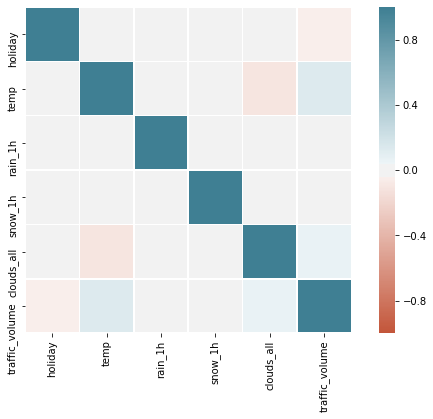

In [32]:
corr_plot(corr)

### Box Plots

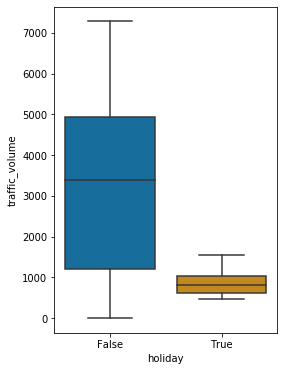

In [37]:
fig, (ax) = plt.subplots(1, 1, figsize=(4, 6))
sns.boxplot(data=df,
               x="holiday", 
               y="traffic_volume",   
               ax=ax,
               palette = "colorblind")

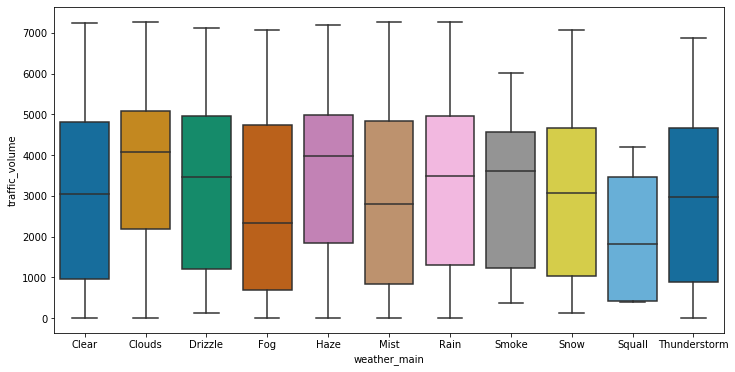

In [39]:
fig, (ax) = plt.subplots(1, 1, figsize=(12, 6))
sns.boxplot(data=df,
               x="weather_main", 
               y="traffic_volume",   
               ax=ax,
               palette = "colorblind")

### Pair Plot

In [40]:
def pair_plot(data,col_names,hue_col):
    fig = sns.pairplot(data, hue = hue_col, vars = col_names,diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4, palette = 'colorblind')
    return fig

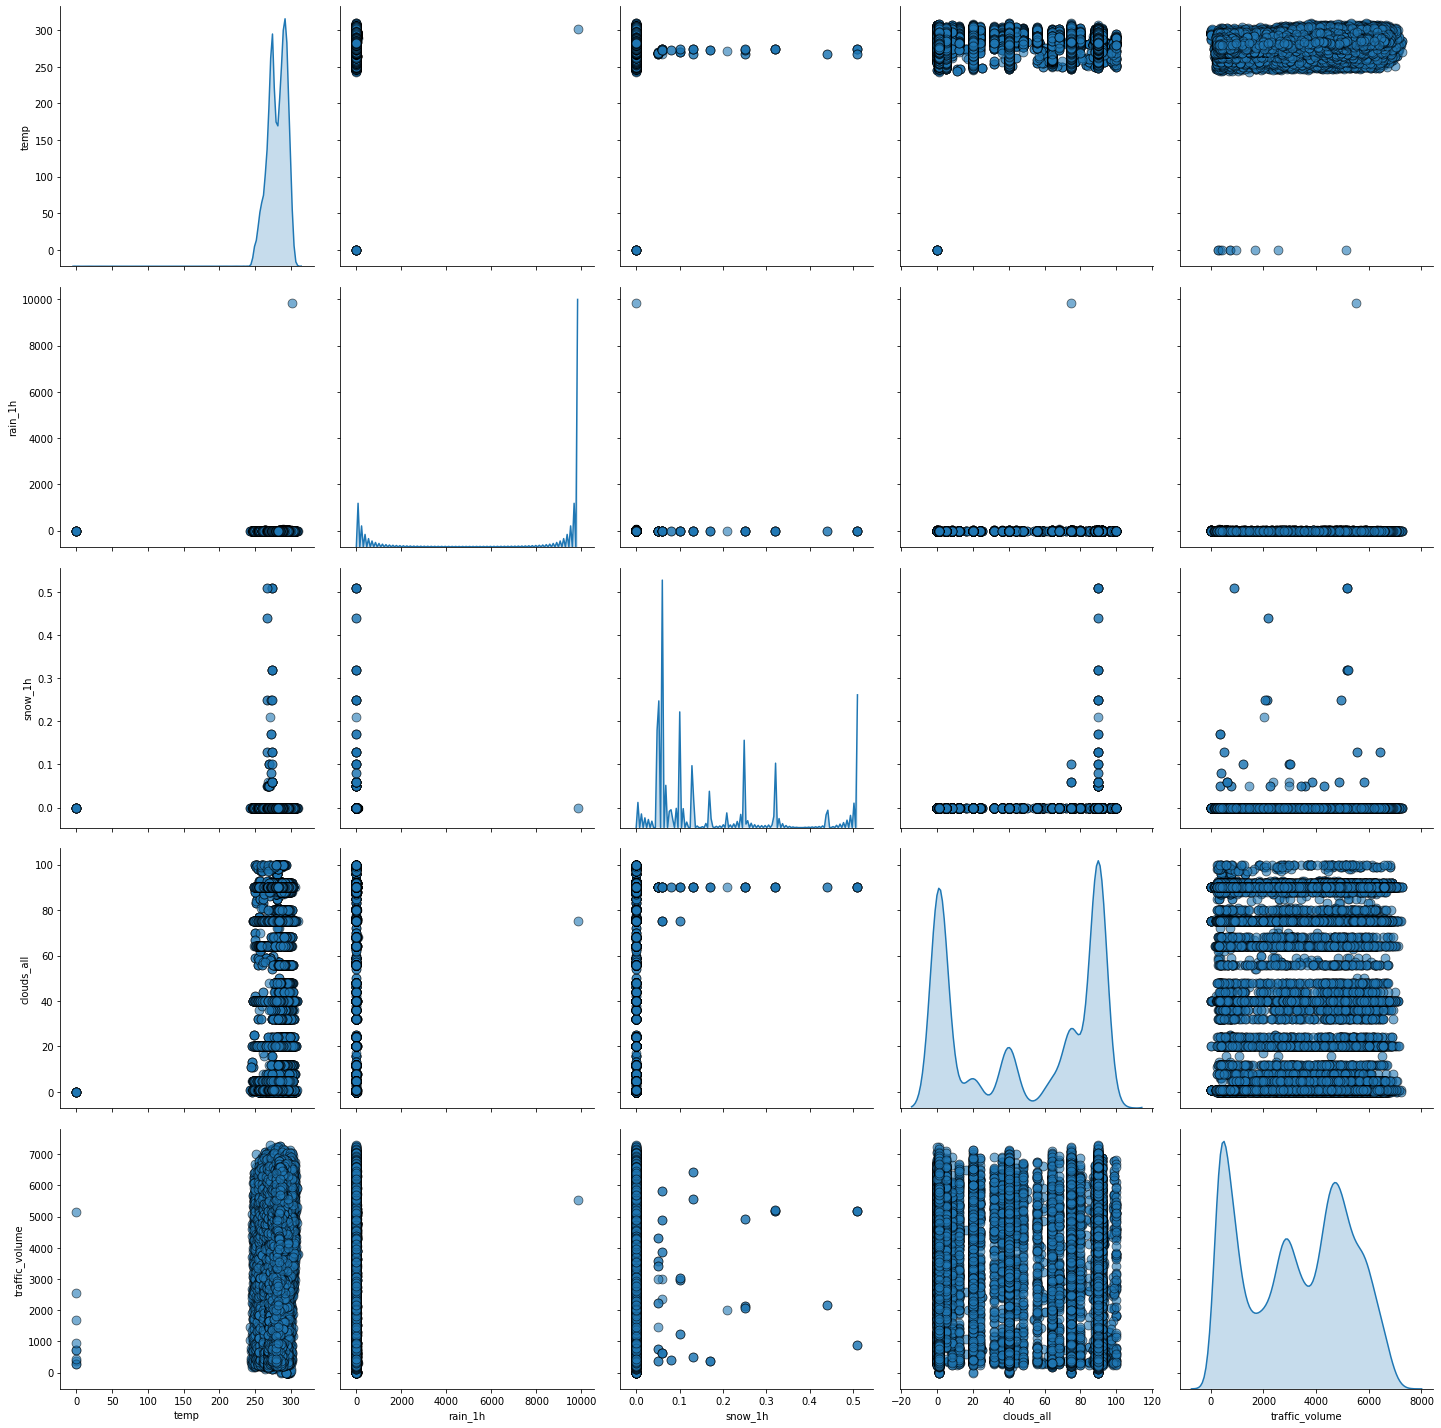

In [41]:
pair_plot(df,df_numeric,None)

### Feature Generation

Creating dummy variables from datatime column. As it is evident from the time series plot, the following columns would make sense:

- Hour
- Weekday

In [42]:
df['hour'] = df.date_time.dt.hour

In [44]:
df['wkday'] = df.date_time.dt.weekday

In [45]:
df.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    False  288.28      0.0      0.0          40       Clouds   
1    False  289.36      0.0      0.0          75       Clouds   
2    False  289.58      0.0      0.0          90       Clouds   
3    False  290.13      0.0      0.0          90       Clouds   
4    False  291.14      0.0      0.0          75       Clouds   

            date_time  traffic_volume  hour  wkday  
0 2012-10-02 09:00:00            5545     9      1  
1 2012-10-02 10:00:00            4516    10      1  
2 2012-10-02 11:00:00            4767    11      1  
3 2012-10-02 12:00:00            5026    12      1  
4 2012-10-02 13:00:00            4918    13      1